**Importing Libraries**

In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from IPython.display import display
%matplotlib inline

**Loading Dataset**

In [2]:
# Soccer database from 'https://www.kaggle.com/hugomathien/soccer'.
# Reading data from database
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
#Displaying all columns for first 5 rows
pd.options.display.max_columns = None
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.set_index('id', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
spri

In [6]:
df.describe(include='all')

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142,180748,183142,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
unique,NaN,NaN,197,NaN,NaN,2,8,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2007-02-22 00:00:00,NaN,NaN,right,medium,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,11794,NaN,NaN,138409,125070,130846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,165671.524291,135900.617324,NaN,68.600015,73.460353,NaN,NaN,NaN,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53851.094769,136927.840510,NaN,7.041139,6.592271,NaN,NaN,NaN,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2.000000,2625.000000,NaN,33.000000,39.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,155798.000000,34763.000000,NaN,64.000000,69.000000,NaN,NaN,NaN,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,183488.000000,77741.000000,NaN,69.000000,74.000000,NaN,NaN,NaN,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,199848.000000,191080.000000,NaN,73.000000,78.000000,NaN,NaN,NaN,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000


**Handling Null Values**

In [7]:
#Finding all Null Values
df.isnull().sum(axis=0)

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [8]:
#Drop rows where atleast 836 records for 38 columns out of 41 columns are NaN because they have all columns as NaN except the columns named 'player_fifa_api_id', 'player_api_id' and 'date' which has no significance in predicting overall rating of a player.
df.dropna(axis=0, how='all', thresh=38, inplace=True)

In [9]:
df.isnull().sum()

player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating           0
potential                0
preferred_foot           0
attacking_work_rate    911
defensive_work_rate      0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                  0
dribbling                0
curve                    0
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility                  0
reactions                0
balance                  0
shot_power               0
jumping                  0
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                   0
penalties                0
marking                  0
standing_tackle          0
sliding_tackle           0
gk_diving                0
g

**Looking at heat map Correlation**

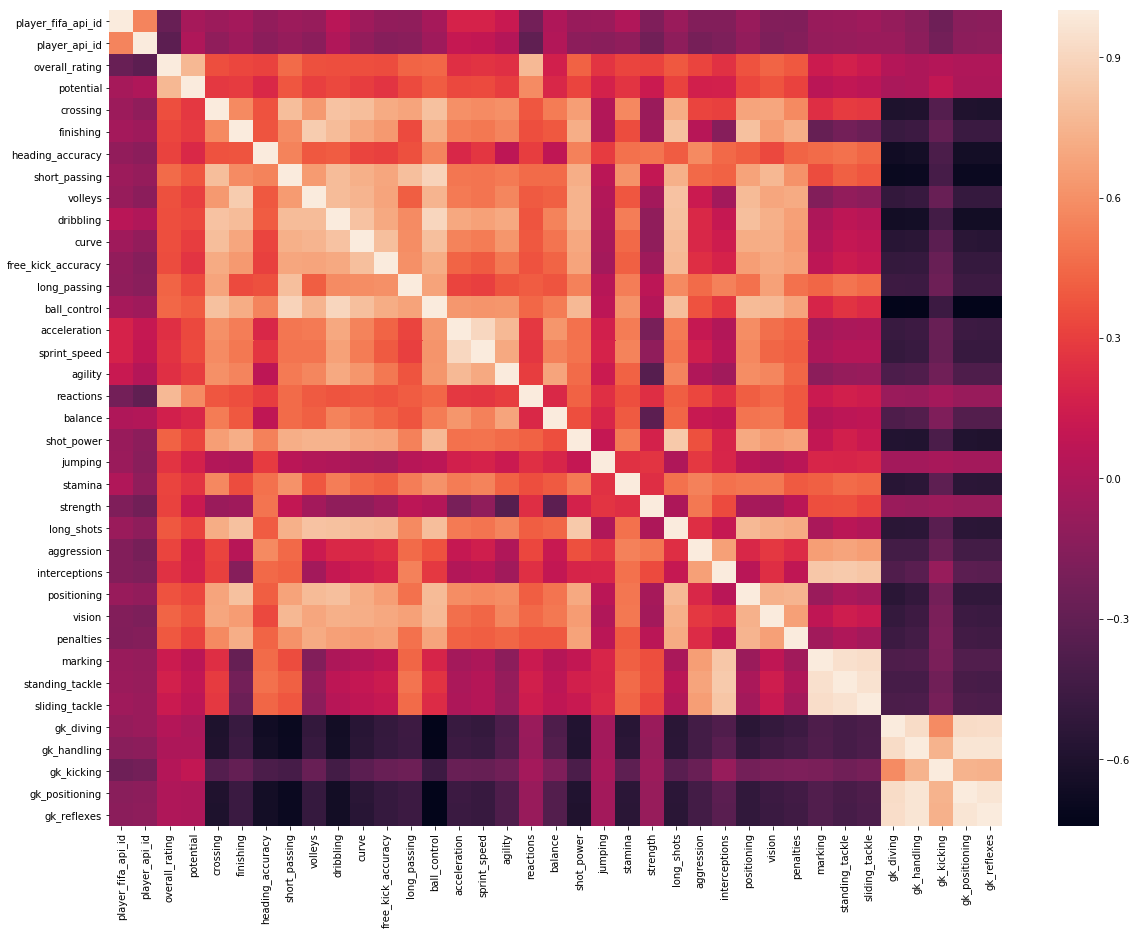

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

**Finding all Categorical Values**

In [11]:
df.preferred_foot.value_counts()

right    136953
left      44312
Name: preferred_foot, dtype: int64

In [12]:
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [13]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
_0           911
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

**One Hot Encoding Categorical Values**

In [14]:
df_dummies_preferredfoot = pd.get_dummies(df.preferred_foot, drop_first=True, prefix='preferred')
df_dummies_attackingworkrate = pd.get_dummies(df.attacking_work_rate, drop_first=True, prefix='attacking')
df_dummies_defensiveworkrate = pd.get_dummies(df.defensive_work_rate, drop_first=True, prefix='defensive')

In [15]:
#Joining these new variables to the 
df = df.join(df_dummies_preferredfoot)
df = df.join(df_dummies_attackingworkrate)
df = df.join(df_dummies_defensiveworkrate)

In [16]:
#Dropping insignificant variables
numerical_df = df.drop(['player_fifa_api_id', 'player_api_id', 'date', 'preferred_foot', 'attacking_work_rate', 
                        'defensive_work_rate'], axis=1)

In [17]:
numerical_df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_right,attacking_high,attacking_le,attacking_low,attacking_medium,attacking_norm,attacking_stoc,attacking_y,defensive_1,defensive_2,defensive_3,defensive_4,defensive_5,defensive_6,defensive_7,defensive_8,defensive_9,defensive__0,defensive_ean,defensive_es,defensive_high,defensive_low,defensive_medium,defensive_o,defensive_ormal,defensive_tocky
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**Fitting Regression Model**

In [18]:
numerical_df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_right',
       'attacking_high', 'attacking_le', 'attacking_low', 'attacking_medium',
       'attacking_norm', 'attacking_stoc', 'attacking_y', 'defensive_1',
       'defensive_2', 'defensive_3', 'defensive_4', 'defensive_5',
       'defensive_6', 'defensive_7', 'defensive_8', 'defensive_9',
       'defensive__0', 'defensive_ean', 'defensive_es', 'defensive_high',
       'defensive_low', 'defensive_medium', 'defensive_o', 'defen

In [19]:
#We romove the below columns based on Backward Elimination using P-values considering the two vital thumbrules. 
# 1) P values for the selected columns are less than 0.05 
# 2) R-squared value 0.786 and Adj. R-squared value 0.786 indicates the model is a sweet fit between overfitting and underfitting
# defensive_4, attacking_medium, defensive_tocky, attacking_stoc, defensive_5, attacking_le, defensive_ean, volleys 

In [20]:
#Building Linear Model using statsmodel
lm = smf.ols(formula='overall_rating ~ crossing + finishing + heading_accuracy + short_passing + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + attacking_high +  attacking_low + attacking_norm +  attacking_y +  defensive_1 + defensive_2 + defensive_3 +  defensive_6 + defensive_7 + defensive_8 + defensive_9 + defensive__0 + defensive_es + defensive_high + defensive_low + defensive_medium + defensive_o + defensive_ormal +  preferred_right', data=numerical_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                 1.362e+04
Date:                Thu, 06 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:50:01   Log-Likelihood:            -4.7076e+05
No. Observations:              181265   AIC:                         9.416e+05
Df Residuals:                  181215   BIC:                         9.421e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.7659      0.159     29.919      0.000       4.454       5.078
crossing              -0.0100      0.001    -10.284      0.000      -0.012      -0.008
finishing              0.0129      0.001     12.475      0.000       0.011       0.015
heading_accuracy       0.0994      0.001    105.795      0.000       0.098       0.101
short_passing          0.0759      0.002     47.422      0.000       0.073       0.079
dribbling             -0.0099      0.001     -7.268      0.000      -0.013      -0.007
curve                  0.0116      0.001     12.575      0.000       0.010       0.013
free_kick_accuracy     0.0102      0.001     12.251      0.000       0.009       0.012
long_passing           0.0168      0.001     15.421      0.000       0.015       0.019
ball_control           0.2299      0.002    128.079      0.000       0.226       0.233
acceleration           0.0401      0.002     25.031      0.000       0.037       0.043
sprint_speed           0.0492      0.002     32.482      0.000       0.046       0.052
agility               -0.0143      0.001    -12.113      0.000      -0.017      -0.012
reactions              0.2763      0.001    226.237      0.000       0.274       0.279
balance                0.0030      0.001      3.342      0.001       0.001       0.005
shot_power             0.0231      0.001     22.751      0.000       0.021       0.025
jumping                0.0124      0.001     14.569      0.000       0.011       0.014
stamina               -0.0158      0.001    -16.489      0.000      -0.018      -0.014
strength               0.0600      0.001     61.326      0.000       0.058       0.062
long_shots            -0.0208      0.001    -19.695      0.000      -0.023      -0.019
aggression             0.0102      0.001     12.778      0.000       0.009       0.012
interceptions          0.0178      0.001     20.840      0.000       0.016       0.020
positioning           -0.0185      0.001    -20.133      0.000      -0.020      -0.017
vision                 0.0081      0.001      8.011      0.000       0.006       0.010
penalties              0.0153      0.001     17.526      0.000       0.014       0.017
marking                0.0327      0.001     25.104      0.000       0.030       0.035
standing_tackle        0.0132      0.002      8.744      0.000       0.010       0.016
sliding_tackle        -0.0270      0.001    -21.043      0.000      -0.030      -0.024
gk_diving              0.2072      0.002    122.424      0.000       0.204       0.211
gk_handling            0.0572      0.002     25.615      0.000       0.053       0.062
gk_kicking            -0.0289      0.001    -39.772      0.000      -0.030      -0.027
gk_positioning         0.0777      0.002     34.980      0.000       0.073       0.082
gk_reflexes            0.0467      0.0

In [21]:
#Splitting the dataset into Training set and Testset
X = numerical_df.loc[:,['crossing','finishing','heading_accuracy','short_passing','dribbling','curve','free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','attacking_high','attacking_low','attacking_norm','attacking_y','defensive_1','defensive_2','defensive_3','defensive_6','defensive_7','defensive_8','defensive_9','defensive__0','defensive_es','defensive_high','defensive_low','defensive_medium','defensive_o','defensive_ormal','preferred_right']].values
y = numerical_df.loc[:,['overall_rating']].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

**Multiple Linear Regression Model**

In [22]:
#Fitting Multiple Linear Regression to the Training set using Scikit learn
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

In [23]:
model.coef_

array([[-0.01097017,  0.01294496,  0.09901524,  0.07616119, -0.01157857,
         0.01225716,  0.01001859,  0.01685518,  0.23179594,  0.03852819,
         0.0505791 , -0.01359534,  0.27591917,  0.00326388,  0.02276042,
         0.01263772, -0.01595509,  0.05998826, -0.02054381,  0.01071303,
         0.01817527, -0.01835354,  0.00778765,  0.01505753,  0.03165124,
         0.01304402, -0.02616935,  0.20825364,  0.05610745, -0.02834946,
         0.07729314,  0.046879  ,  0.13375479,  1.59039159,  0.60571726,
         1.727272  ,  2.01342623,  0.97879513,  1.4512086 ,  1.69220481,
         1.91731199,  1.92507689,  1.09294202,  0.67828779,  1.727272  ,
         1.58457264,  1.91454931,  1.26973021,  0.97595892,  0.60571726,
        -0.05928746]])

In [24]:
model.intercept_

array([4.73106734])

In [25]:
model.score(X_train, y_train)

0.7871993300319079

In [26]:
model.score(X_test, y_test)

0.7835732023003983

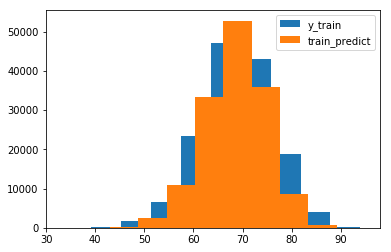

In [27]:
plt.hist(y_train, label='y_train')
plt.hist(model.predict(X_train), label='train_predict')
plt.legend()

In [28]:
#Model Prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [29]:
#Evaluating Multiple Linear Regression Model Performance
print('RMSE Train : ', sqrt(mean_squared_error(y_train_pred, y_train)))
print('RMSE Test : ', sqrt(mean_squared_error(y_test_pred, y_test)))

RMSE Train :  3.2430050083037205
RMSE Test :  3.269894369512717


In [30]:
#We see that the RMSE value is less and nearly same and hence we can say that the model is a good fit.

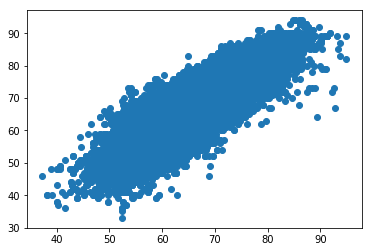

In [31]:
plt.scatter(y_train_pred,y_train)

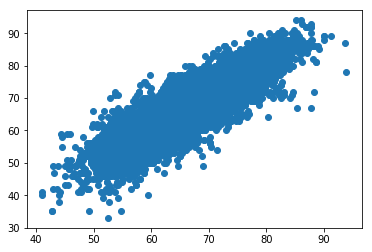

In [32]:
plt.scatter(y_test_pred,y_test)

In [33]:
#The below two histograms reveal that error has normal distribution for both training target variable vs training predicted target variable and test target variable vs test predicted target variable

(array([2.0000e+00, 3.0000e+00, 1.3000e+01, 7.0000e+00, 1.2000e+01,
        2.5000e+01, 4.9000e+01, 7.1000e+01, 7.2000e+01, 1.4100e+02,
        2.6800e+02, 4.2200e+02, 7.9400e+02, 1.4130e+03, 2.3120e+03,
        3.4560e+03, 5.2420e+03, 7.5000e+03, 1.0095e+04, 1.3176e+04,
        1.5724e+04, 1.7653e+04, 1.7658e+04, 1.5453e+04, 1.2024e+04,
        8.3610e+03, 5.1050e+03, 3.2240e+03, 2.0340e+03, 1.1600e+03,
        5.9300e+02, 3.6100e+02, 2.2800e+02, 1.4000e+02, 6.6000e+01,
        4.9000e+01, 3.0000e+01, 2.0000e+01, 2.2000e+01, 1.4000e+01,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 7.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-19.48149767, -18.57720997, -17.67292228, -16.76863458,
        -15.86434688, -14.96005918, -14.05577148, -13.15148378,
        -12.24719609, -11.34290839, -10.43862069,  -9.53433299,
         -8.63004529,  -7.72575759,  -6.82146989,  -5.9171822 ,
         -5.0128945 ,  -4.1086068 ,  -3.2043191 ,  -2.3000314 

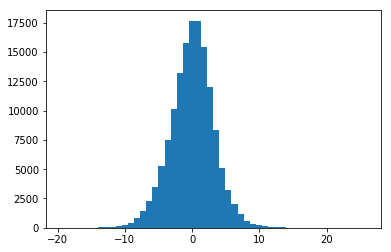

In [34]:
plt.hist(y_train_pred - y_train, bins=50)

(array([1.000e+00, 4.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 1.000e+01,
        1.600e+01, 1.100e+01, 2.700e+01, 3.300e+01, 5.100e+01, 7.900e+01,
        1.370e+02, 2.420e+02, 3.880e+02, 5.910e+02, 7.720e+02, 1.128e+03,
        1.563e+03, 2.002e+03, 2.541e+03, 3.125e+03, 3.609e+03, 3.709e+03,
        3.896e+03, 3.338e+03, 2.792e+03, 2.068e+03, 1.410e+03, 9.670e+02,
        6.260e+02, 3.930e+02, 2.760e+02, 1.510e+02, 9.400e+01, 5.800e+01,
        3.700e+01, 3.600e+01, 1.800e+01, 1.200e+01, 1.000e+01, 1.000e+01,
        3.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        4.000e+00, 1.000e+00]),
 array([-18.22871162, -17.44822745, -16.66774328, -15.88725911,
        -15.10677494, -14.32629077, -13.5458066 , -12.76532243,
        -11.98483826, -11.2043541 , -10.42386993,  -9.64338576,
         -8.86290159,  -8.08241742,  -7.30193325,  -6.52144908,
         -5.74096491,  -4.96048074,  -4.17999657,  -3.3995124 ,
         -2.61902823,  -1.83854406,  -1.05805989,  -0.27

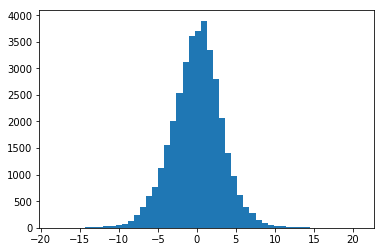

In [35]:
plt.hist(y_test_pred - y_test, bins=50)

**Decision Tree Regression Model**

In [36]:
#Fitting Decision Tree Regression Model to the dataset
decisionregressor = DecisionTreeRegressor(random_state=0)
decisionregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [37]:
decisionregressor.score(X_test, y_test)

0.965722542265359

In [38]:
decisionregressor.score(X_train, y_train)

0.9991166446674667

In [39]:
#Model Prediction
y_decision_train_pred = decisionregressor.predict(X_train)
y_decision_test_pred = decisionregressor.predict(X_test)

In [40]:
#Evaluating Decision Tree Regression Model Performance
print('RMSE Train', sqrt(mean_squared_error(y_pred=y_decision_train_pred,y_true= y_train)))
print('RMSE Test' , sqrt(mean_squared_error(y_decision_test_pred, y_test)))

RMSE Train 0.20894348853783676
RMSE Test 1.3013152182568235


In [41]:
#We see that RMSE value for both Training and Test data is different.
#Test RMSE is more than Train RMSE which reveals the model may be an overfitting one.

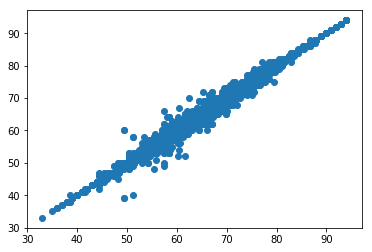

In [42]:
plt.scatter(y_decision_train_pred, y_train)

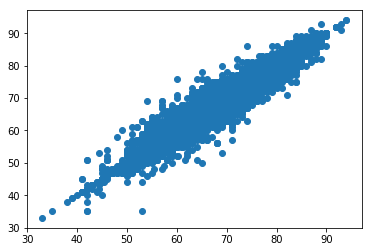

In [43]:
plt.scatter(y_decision_test_pred, y_test)

**XGBoost Model**

In [44]:
#Let's try XGboost algorithm to see if we can get even better results
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, subsample=0.75, max_depth=7)

In [45]:
#Fitting the Xgboost method
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [46]:
#predicting rating of players via Xgboost
y_xgb_test_pred = xgb.predict(X_test)

In [51]:
#improved RMSE
print('RMSE Test' , sqrt(mean_squared_error(y_test, y_xgb_test_pred)))

RMSE Test 1.263909322331002


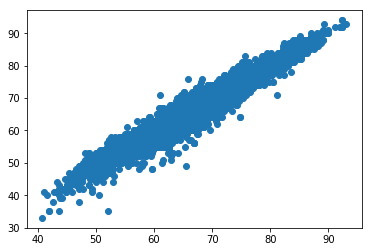

In [52]:
plt.scatter(y_xgb_test_pred, y_test)

In [48]:
#calculating prediction scores of diffrent model with y_test
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test_pred,y_test))
print(explained_variance_score(y_decision_test_pred,y_test))
print(explained_variance_score(y_xgb_test_pred,y_test))

0.7227345488463524
0.9656663743160282
0.9662316724284646


In [49]:
#A group of predictors were selected to undergo data preprocessing tasks and fed into two different Machine Learning algorithms namely Multiple Linear Regression and DecisionTree Regression.

In [50]:
#Inference/Conclusion : Predictive analysis report indicates that XGBoost Model works better than Linear Regression Model and DecisionTree Regression Model.
#So, players rating is to be predicted with XGBoost Model.